In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [35]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:xlabel='MEDV'>

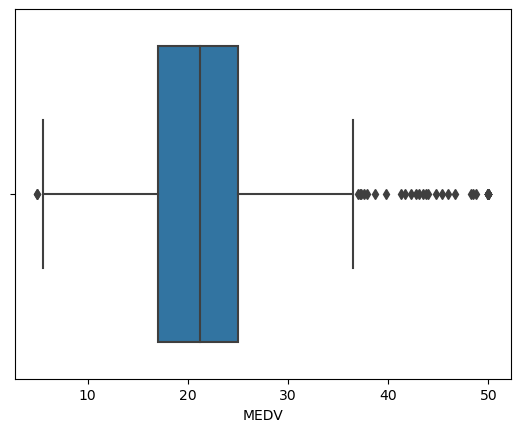

In [36]:
#For the "Median value of owner-occupied homes"
sns.boxplot(data = boston_df, x= 'MEDV', orient = 'h')

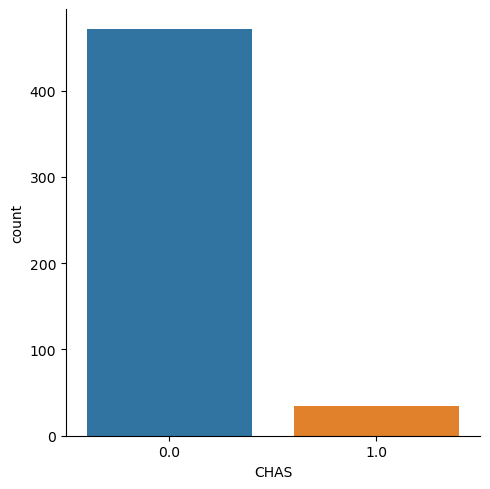

In [37]:
#For the "Charles river variable"
sns.catplot(x='CHAS', kind='count', data=boston_df)

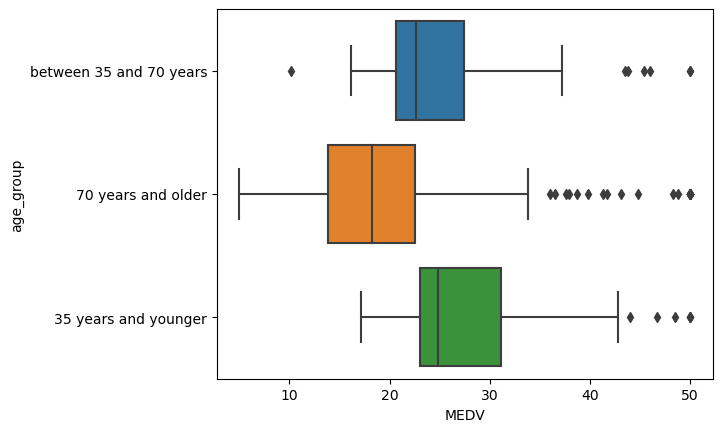

In [38]:
#For the "MEDV variable" vs the "AGE variable"
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x="MEDV", y="age_group",
                 data=boston_df)

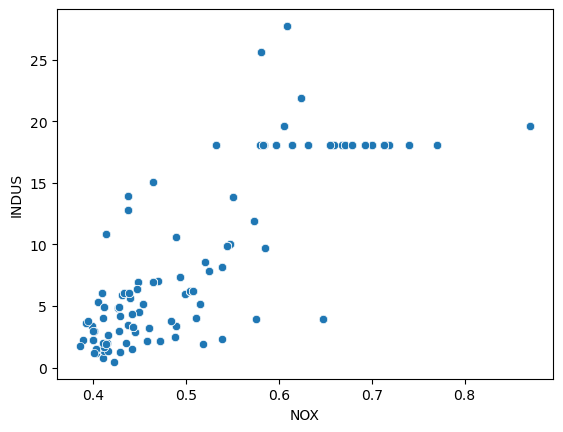

In [39]:
#For the relationship between "Nitric oxide concentrations" and the "proportion of non-retail business acres per town"
ax = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df)

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


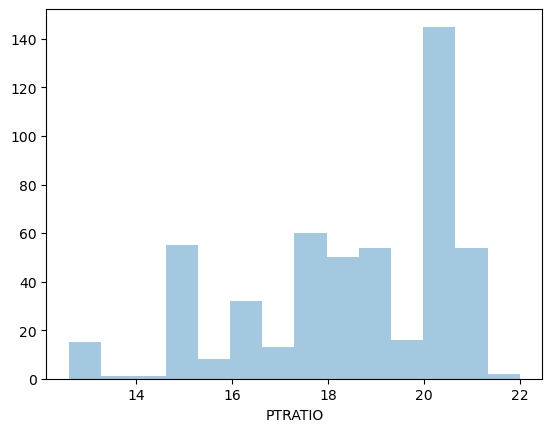

In [40]:
#For the "pupil to teacher ratio variable"
ax = sns.distplot(boston_df['PTRATIO'], kde = False)

In [41]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#State the hypothesis
# H_0: µ_1 = µ_2 ("there is no difference in median value of houses bounded by the Charles river")
# H_1: µ_1 ≠ µ_2 ("there is a difference in median value of houses bounded by the Charles river")
# Use α = 0.05

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [42]:
# As the result p-value is less than α = 0.05 so we have to reject the null hypothesis which means there is a difference in median value of houses bounded by the Charles river

In [43]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [44]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#State the hypothesis
# H_0: µ_1 = µ_2 ("there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?")
# H_1: µ_1 ≠ µ_2 ("there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?")
# Use α = 0.05

thirtyfive_lower_MEDV   = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_MEDV = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older_MEDV      = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_MEDV, thirtyfive_seventy_MEDV, seventy_older_MEDV)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [45]:
# As the result p-value is less than α = 0.05 so we have to reject the null hypothesis which means there is a difference in Median values of houses (MEDV) 
# for each proportion of owner occupied units built prior to 1940 (AGE)

In [46]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#State the hypothesis
# H_0: "there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town"
# H_1: "there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town"
# Use α = 0.05

pearson_coeff, p_value =scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson_coeff: {0}, P-Value: {1}".format(pearson_coeff,p_value))

Pearson_coeff: 0.7636514469209151, P-Value: 7.913361061238693e-98


In [47]:
# As the result p-value is less than α = 0.05 so we have to reject the null hypothesis which means there is a relationship between Nitric oxide concentrations 
# and proportion of non-retail business acres per town
# Correlation coefficient value is 0.764 which mean the have strong relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [50]:
# What is the impact of an additional weighted distance to the five Boston employment centres [DIS] on the median value of owner occupied homes [MEDV]? (Regression analysis)
# State the hypothesis
# H_0: β1$ = 0 (MEDV has no effect on DIS)
# H_1: β1$ is not equal to 0 (MEDV has an effect on DIS)
# Use α = 0.05

## X is the input variables (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['DIS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        16:19:48   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is MEDV has an effect on DIS.
# The coefficient 0.0572 means that MEDV get 0.0572 scores more than DIS.